# Regression
sklearn, pandas, and statsmodels, all have modules for linear regreession. Sklearn is faster but gives less details. I recommend to use pandas and statsmodels modules functions for regression. 









# Load file
Commonly two libraries are used to load a csv files.
- numpy function `np.loadtext` and `np.genfromtext ` 
- pandas function `pd.read_csv`

Here we prefer using pandas

In [1]:
import pandas as pd
path='data/'
filename = path+'Advertising.csv'
advertising = pd.read_csv(filename, usecols=[1, 2, 3, 4])

In [2]:
advertising.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [3]:
import numpy as np
np.mean(advertising['sales'])

14.022500000000003

# Fit linear regression
Here we use sklearn to fit the regression. Sklearn provides minimal regression summary. It is more convenient to use statsmodels if long summary with more details is needed


#  Linear Regression using sklearn

In [4]:
from sklearn.linear_model import LinearRegression

# initialize the model first
lr = LinearRegression()

In [5]:
# fit the model and feed the data
lr.fit(X = advertising[ ['TV'] ], y = advertising['sales'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
# regression parameters intercept is beta0 and coef_ is beta1
print(lr.intercept_, lr.coef_)

7.0325935491276965 [0.04753664]


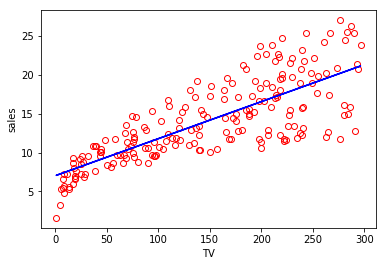

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(advertising.TV, advertising.sales, 'or', mfc='none');

# add a regression line
plt.plot(advertising.TV, lr.intercept_+lr.coef_*advertising.TV, "-b");
plt.xlabel('TV');
plt.ylabel('sales');

# Exercise
Do the same with `radio`
- Predict sales using radio advertisement
- Plot the data 
- Add the predicted line.

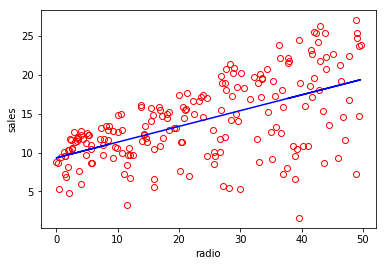

In [8]:
lr = LinearRegression()
lr.fit(X = advertising[ ['radio'] ], y = advertising['sales'])
plt.plot(advertising.radio, advertising.sales, 'or', mfc='none');
# add a regression line
plt.plot(advertising.radio, lr.intercept_+lr.coef_*advertising.radio, "-b");
plt.xlabel('radio');
plt.ylabel('sales');

# Multiple Linear Regression
There is no need to fit a line one by one. One may fit a plane to several features.


In [9]:
lr = LinearRegression()
lr.fit(X = advertising[ ['TV', 'radio', 'newspaper'] ], y = advertising['sales'])
x = np.array([250, 30, 20] )
# sample in row, features in column
lr.predict(x.reshape(1,3))





array([20.01520138])

In [10]:
x = np.array([250, 30, 20, 249, 29, 19] )
lr.predict(x.reshape(2,3))




array([20.01520138, 19.78194421])

# statsmodels 
Using statsmodels library for fitting linear regressions provides more details. This is specially needed if interpretation of the linear model is of interest.


In [11]:
import statsmodels.formula.api as smf
model = smf.ols(formula='sales ~ TV + radio + newspaper', data = advertising)
lr = model.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 05 Nov 2018   Prob (F-statistic):           1.58e-96
Time:                        10:18:49   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
import statsmodels.formula.api as smf
model = smf.ols(formula='sales ~ TV', data = advertising)
lr = model.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 05 Nov 2018   Prob (F-statistic):           1.47e-42
Time:                        10:18:49   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""